In [ ]:
!pip install pymorphy2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, MiniBatchKMeans

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/precedents.xlsx')

In [ ]:
data

,place,precedent
0,"('Производство электрообеспечения «Ямал»', 'ПК...",Работник ПО при передвижении по территории ГТЭ...
1,"('ТП Ноябрьск ПГИ', 'Не привлекался', 'Не опре...",Нет поручней на приемных мостках
2,"('АО ""Мессояханефтегаз""', 'Эриэллнефтегазсерви...",Сотрудник сторонней организации находился без ...
3,"('АО ""Мессояханефтегаз""', 'Эриэллнефтегазсерви...",В зоне шланга высокого давления находился рабо...
4,"('ООО ""Газпромнефть-Хантос""', 'Не привлекался'...",При обходе КП-614 было обнаружен перепад по ли...
...,...,...
247255,"('ОНПЗ', 'Товарное производство', 'Товарно-сыр...",Оторваны элементы ограждения площадки обслужив...
247256,"('МНПЗ', 'Производство № 1 - первичной перераб...",УБРАТЬ МУСОР ВОЗЛЕ ТБО.
247257,"('МНПЗ', 'Производство № 2 - каталитического к...",Старые паронитовые прокладки рядом м насосом Н...
247258,"('МНПЗ', 'Общезаводское хозяйство', 'Комплекс ...",Заканчивается срок поверки манометра на нагнет...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247260 entries, 0 to 247259
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   place      247260 non-null  object
 1   precedent  247254 non-null  object
dtypes: object(2)
memory usage: 3.8+ MB


Тут мы проводим лемматизацию, предварительно удаляя буквы английского алфавита и ненужные нам символы, а так же фильтруя стоп-слова, которые не несут смысловой нагрузки.
Дальше нам нужно создать векторное представление слов. Это можно сделать, например, с помощью tf-idf.

In [ ]:
#patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
patterns = "[A-Za-z0-9!#$%&«»'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
stopwords_ru.append("наблюдал")
stopwords_ru.append("обнаружил")
stopwords_ru.append("работал")
morph = MorphAnalyzer()
short_words = []
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        token = token.strip()
        token = morph.normal_forms(token)[0]  
        if (token not in stopwords_ru) and (len(token) >2):
            #if (dictionary.check(token)):
            tokens.append(token)
 
    #if len(tokens) > 2:
        #return tokens
    #return None
    return tokens
 
def convert_data(data, vectorized_data=False):
    filtered_data = pd.DataFrame([])
    filtered_data['precedent'] = data['precedent'].astype('str').apply(lemmatize)
    vectorizer2 = TfidfVectorizer(max_df=0.1, min_df=0.005)
    matrix_precedent = vectorizer2.fit_transform(filtered_data['precedent'].astype('str'))
    if (vectorized_data):
        filtered_data['place'] = data['place']
        vectorizer1 = TfidfVectorizer(max_df=0.1, min_df=0.005)
        matrix_place = vectorizer1.fit_transform(filtered_data['place'].astype('str'))
        train_data = pd.DataFrame(data=np.hstack((matrix_place.toarray(), matrix_precedent.toarray())), columns=vectorizer1.get_feature_names() + vectorizer2.get_feature_names())
        return train_data
    else:
        return matrix_precedent

In [ ]:
filtered_data = convert_data(data)

KeyboardInterrupt: ignored

In [ ]:
filtered_data

,Unnamed: 0,place,precedent
0,0,"['производство', 'электрообеспечение', '«ямал»...","['работник', 'по', 'передвижение', 'территория..."
1,1,"['тп', 'ноябрьск', 'пги', 'не', 'привлекаться'...","['нет', 'поручный', 'приёмный', 'мосток']"
2,2,"['ао', 'мессояханефтегаз', 'эриэллнефтегазсерв...","['сотрудник', 'сторонний', 'организация', 'нах..."
3,3,"['ао', 'мессояханефтегаз', 'эриэллнефтегазсерв...","['в', 'зона', 'шланг', 'высокий', 'давление', ..."
4,4,"['ооо', 'газпромнефть', 'хантос', 'не', 'привл...","['при', 'обход', 'кп', '614', 'обнаружить', 'п..."
...,...,...,...
247255,247255,"['онпз', 'товарный', 'производство', 'товарный...","['оторвать', 'элемент', 'ограждение', 'площадк..."
247256,247256,"['мнпз', 'производство', '№', '1', 'первичный'...","['убрать', 'мусор', 'возле', 'тбо']"
247257,247257,"['мнпз', 'производство', '№', '2', 'каталитиче...","['старый', 'паронитовый', 'прокладка', 'рядом'..."
247258,247258,"['мнпз', 'общезаводский', 'хозяйство', 'компле...","['заканчиваться', 'срок', 'поверка', 'манометр..."


In [ ]:
filtered_data.to_excel('/content/drive/MyDrive/filtered_precedents_data.xlsx')

In [ ]:
filtered_data = pd.read_excel('/content/drive/MyDrive/filtered_precedents_data.xlsx')

In [ ]:
filtered_data3 = pd.read_excel('/content/drive/MyDrive/filtered_precedents_data(len>3).xlsx')

In [ ]:
final_data = pd.read_excel('/content/drive/MyDrive/filtered_precedents_data_final.xlsx')

In [ ]:
vectorizer3 = TfidfVectorizer(max_df=0.1, min_df=0.005)
matrix_precedent3 = vectorizer3.fit_transform(filtered_data3['precedent'].astype('str'))

In [ ]:
matrix_precedent3

<247260x312 sparse matrix of type '<class 'numpy.float64'>'
	with 1279354 stored elements in Compressed Sparse Row format>

In [ ]:
cls3 = DBSCAN(eps=0.78, min_samples=100).fit_predict(matrix_precedent3[:25000])

In [ ]:
pd.Series(cls3).unique()

array([-1,  0,  3,  1,  2, 12,  4,  5, 10,  6, 15, 14,  8,  7,  9, 13, 11])

In [ ]:
data[:25000][cls3 == 12].sample(10)

,place,precedent
14752,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Пропуск по сальниковым уплотнениям на НВО-1\n
3791,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Пропуски по сальниковому уплотнению цднг 5 твр...
16169,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Пропуски жидкости по сальниковому уплотнению в...
14248,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Требуется ревизия сальникового уплотнения ЗКЛ ...
15145,"('ООО ""Газпромнефть-Хантос""', 'Не привлекался'...",Пропуски жидкости через сальниковые уплотнения...
4695,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Пропуск жидкости по сальниковому уплотнению НВ...
9579,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",к.16 Б Суторминское м/р пропуски по сальников...
3596,"('Филиал ""Газпромнефть-Муравленко""', 'Не привл...",Утечка газа по сальниковому уплотнению ЗКЛ.
3836,"('Производство ТВС N1', 'Не привлекался', 'Не ...",При запуске насоса в МКНУ №2 слышен посторонни...
22331,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",к.182 АГЗУ Суторминского м/р пропуски по сальн...


In [ ]:
clustering3 = MiniBatchKMeans(n_clusters=6).fit_predict(matrix_precedent3)

In [ ]:
data[clustering3 == 5]#.sample(10)

NameError: ignored

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [ ]:
tsne = TSNE(random_state = 321)
tsne_representation = tsne.fit_transform(matrix_precedent3[:1000])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

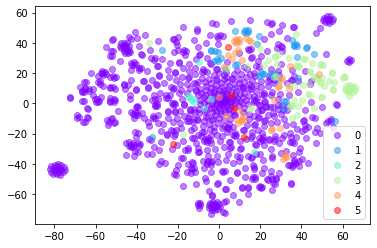

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(set(clustering3[:1000]))))
for y, c in zip(set(clustering3[:1000]), colors):
    plt.scatter(tsne_representation[clustering3[:1000]==y, 0], 
                tsne_representation[clustering3[:1000]==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

In [ ]:
cls3 = DBSCAN(eps=0.775, min_samples=200).fit_predict(matrix_precedent3)

In [ ]:
pd.Series(cls3).to_excel('/content/drive/MyDrive/cls.xlsx')

In [ ]:
pd.Series(cls3).unique()

array([-1,  0,  1,  6,  5,  7,  4,  2,  3, 10, 11, 12,  8,  9, 13])

In [ ]:
data[cls3 == 2]#.sample(10)

,place,precedent
683,"('АО ""Мессояханефтегаз""', 'Интелект Дриллинг С...",Не закрыт цепочками выход на наклонный желоб
1697,"('АО ""Мессояханефтегаз""', 'АКРОС ООО', 'Бурени...",В БДЕ люк не был закрыт
2463,"('Производство ТВС N1', 'Не привлекался', 'Не ...",Обнаружил не закрытый распределительный щит.
2468,"('ООО ""Ноябрьскэнергонефть""', 'Не привлекался'...",Обнаружил не закрытый распределительный щит.
2963,"('АО ""Мессояханефтегаз""', 'Халлибуртон Интернэ...",Не закрыт люк в БПР
...,...,...
246471,"('МНПЗ', 'Производство № 1 - первичной перераб...",Не плотно закрыт люк колодца после промывки ка...
246785,"('МНПЗ', 'Общезаводское хозяйство', 'Комплекс ...",Не герметично закрыты танкеры в помещение филь...
246849,"('МНПЗ', 'Общезаводское хозяйство', 'Комплекс ...",Приямок не закрыт просечным листом.
246852,"('МНПЗ', 'Общезаводское хозяйство', 'Комплекс ...",В насосной 2УППВ дренажный приямок не закрыт п...


In [ ]:
vectorizer4 = TfidfVectorizer(max_df=0.1, min_df=0.005)
matrix_precedent4 = vectorizer4.fit_transform(final_data['precedent'].astype('str'))

In [ ]:
final_data

,Unnamed: 0,precedent,place
0,0,"['работник', 'передвижение', 'территория', 'ос...","('Производство электрообеспечения «Ямал»', 'ПК..."
1,1,"['поручный', 'приёмный', 'мосток']","('ТП Ноябрьск ПГИ', 'Не привлекался', 'Не опре..."
2,2,"['сотрудник', 'сторонний', 'организация', 'нах...","('АО ""Мессояханефтегаз""', 'Эриэллнефтегазсерви..."
3,3,"['зона', 'шланг', 'высокий', 'давление', 'нахо...","('АО ""Мессояханефтегаз""', 'Эриэллнефтегазсерви..."
4,4,"['обход', 'обнаружить', 'перепад', 'линейный',...","('ООО ""Газпромнефть-Хантос""', 'Не привлекался'..."
...,...,...,...
247255,247255,"['оторвать', 'элемент', 'ограждение', 'площадк...","('ОНПЗ', 'Товарное производство', 'Товарно-сыр..."
247256,247256,"['убрать', 'мусор', 'возле']","('МНПЗ', 'Производство № 1 - первичной перераб..."
247257,247257,"['старый', 'прокладка', 'рядом', 'насос']","('МНПЗ', 'Производство № 2 - каталитического к..."
247258,247258,"['заканчиваться', 'срок', 'поверка', 'манометр...","('МНПЗ', 'Общезаводское хозяйство', 'Комплекс ..."


In [ ]:
clustering = MiniBatchKMeans(n_clusters=12).fit_predict(matrix_precedent4)

In [ ]:
final_data[clustering == 1].sample(10)

,Unnamed: 0,precedent,place
77013,77013,"['посторонний', 'предмет', 'мусор']","('ЦТОиРТ-4', 'Трубопровод нефтесборный к.10-т...."
155768,155768,"['процесс', 'заправка', 'машинист', 'применить...","('АО Газпромнефть - Аэро', 'Представительство ..."
155769,155769,"['процесс', 'заправка', 'машинист', 'применить...","('АО Газпромнефть - Аэро', 'Представительство ..."
236723,236723,"['мусор', 'посторонний', 'предмет', 'территори...","('МНПЗ', 'Производство № 2 - каталитического к..."
176875,176875,"['посторонний', 'предмет', 'поддон', 'металлол...","('ОЗСМ', 'Блок производства', 'Комплекс депара..."
239600,239600,"['проведение', 'ремонтный', 'работа', 'блок', ...","('МНПЗ', 'Производство № 2 - каталитического к..."
2085,2085,"['работник', 'находиться', 'сизый', 'очки']","('ООО ""Газпромнефть-Оренбург""', 'Не привлекалс..."
1235,1235,"['проверка', 'сотрудник', 'передвигаться', 'пл...","('ООО ""Газпромнефть-Хантос""', 'КНГ-Сервис ООО'..."
168383,168383,"['возможно', 'падение', 'каска', 'голова', 'от...","('АО Газпромнефть - Аэро', 'Представительство ..."
53183,53183,"['посторонний', 'предмет']","('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при..."


In [ ]:
model = DBSCAN(eps=0.78, min_samples=100)

In [ ]:
cls = model.fit_predict(matrix_precedent4[:25000])

In [ ]:
pd.Series(cls).unique()

array([-1,  0,  3,  1,  2,  4, 18,  5,  7,  6,  9, 11,  8, 16, 10, 21, 15,
       20, 13, 12, 14, 19, 17])

In [ ]:
data[:25000][cls == 5]#.sample(10)

,place,precedent
39,"('ООО ""Газпромнефть-Хантос""', 'Не привлекался'...",На к.п.11 лестничный марш ростверка покрыт льдом.
46,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...","Въезд на базу ЦДНГ-7, не открываются ворота."
49,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Не горит свет в БРХ ДНС-2
57,"('АО ""Мессояханефтегаз""', 'Эриэллнефтегазсерви...",ТС КАМАЗ стоял под ВЛ
100,"('АО ""Мессояханефтегаз""', 'Интелект Дриллинг С...",Вспомогательная легость в перехлестах
...,...,...
24943,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Замазученность ЗКЛ №377\n
24944,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...",Нефтяные подтеки на ЗКЛ №209 в НБ НВО \n
24973,"('АО ""Мессояханефтегаз""', 'Не привлекался', 'Н...",Порывом ветра с АВО УПТГ-4 сорвало металлическ...
24977,"('АО ""Газпромнефть-Ноябрьскнефтегаз""', 'Не при...","Полы ростверга деревянные, с дырами."


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [ ]:
tsne = TSNE(random_state = 321)
tsne_representation = tsne.fit_transform(matrix_precedent4[:25000])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

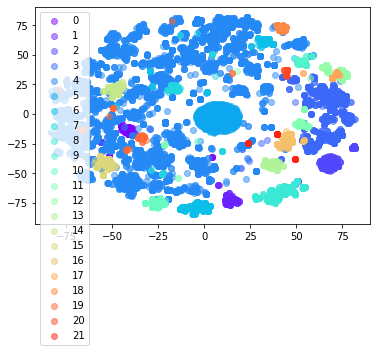

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(set(cls))))
for y, c in zip(set(cls), colors):
  if y != -1:
    plt.scatter(tsne_representation[cls==y, 0], 
                tsne_representation[cls==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()